# U.S. Opiate Prescriptions

Accidental death by fatal drug overdose is a rising trend in the United States. What can we do to help?

Below is a dataframe that I will be using to dive into the opioid crisis as I wrangle through and provide visuals that bertain to the csv dataframes I have available.

The 1st one, opioid.csv, lists the known opioid drug names and their generic names.
The Overdoses.csv contains data provided from the 50 states in regards to their population and opioid related deaths.
Finally, the Prescriber-info.csv provides data reguarding a specified prescriber. their gender, state, and speciality are provided, as well as the drugs they prescribed to their patients. Opioids and non opioid drugs.

This dataset contains summaries of prescription records for 250 common opioid and non-opioid drugs written by 25,000 unique licensed medical professionals in 2014 in the United States for citizens covered under Class D Medicare as well as some metadata about the doctors themselves. This is only a small subset of data that was sourced from a much larger file: cms.gov. 

The full dataset contains almost 24 million prescription instances in long format. This data has already been previously cleaned and compiled here in a format with 1 row per prescriber and limited the approximately 1 million total unique prescribers down to 25,000 to keep it manageable. 


### A key for reading the dataset

NPI – unique National Provider Identifier number

Gender - (M/F)

State - US State by abbreviation

Credentials - set of initials indicative of medical degree

Specialty - description of type of medicinal practice

# Importing in necesary libraries for Data Wrangling then reading in data

In [1]:
import pandas as pd
import numpy as np
import re

#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
opioids = pd.read_csv('opioids.csv')
overdoses = pd.read_csv('overdoses.csv', thousands = ',')
prescriber = pd.read_csv('prescriber-info.csv')

# Exploratory Analysis

In [3]:
#See what the we're working with for these dataframes
opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [4]:
overdoses.head()

,State,Population,Deaths,Abbrev
0,Alabama,4833722,723,AL
1,Alaska,735132,124,AK
2,Arizona,6626624,1211,AZ
3,Arkansas,2959373,356,AR
4,California,38332521,4521,CA


In [5]:
prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [6]:
# Find how many unique Specialties there are within our datafram. 
print('Number of unique Specialties: ', len(prescriber['Specialty'].unique()))

Number of unique Specialties:  109


In [7]:
prescriber.describe()

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,1.498162e+09,3.157160,2.370400,1.05368,7.041000,0.708440,8.962840,9.305720,16.12812,2.394840,...,2.18804,2.238160,2.551600,0.806240,19.198040,3.348240,4.070880,1.119440,11.573120,0.587520
std,2.877233e+08,20.755819,11.631601,6.66110,25.898648,5.224049,36.520987,29.375476,69.35317,14.266314,...,10.08554,13.325884,23.327117,4.951929,86.501125,17.127556,18.467437,10.299475,39.136616,0.492291
min,1.003002e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245473e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.497842e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.740406e+09,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.992999e+09,770.000000,644.000000,356.00000,1105.000000,275.000000,2431.000000,790.000000,5716.00000,596.000000,...,528.00000,902.000000,1814.000000,143.000000,6029.000000,596.000000,772.000000,694.000000,2107.000000,1.000000


Quick check for any missing or null values within our dataset. We see that the Credentials column is the only one with any missing values. There are 763 missing values within that column. In general, we aren't too concerned with our prescribers credentials so we'll go ahead and remove it from our dataframe. We know they worked very hard to optain these credentials to enhance their careers but for us, by removing it we will lighten some bulk from our dataframe.

In [8]:
# Find any NaN listings in the Specialty column
prescriber.isnull().sum()

NPI                    0
Gender                 0
State                  0
Credentials          763
Specialty              0
                    ... 
XARELTO                0
ZETIA                  0
ZIPRASIDONE.HCL        0
ZOLPIDEM.TARTRATE      0
Opioid.Prescriber      0
Length: 256, dtype: int64

In [9]:
# Since we'll focus on the Specialty column, we'll go ahead and remove the Credentials column
# We also don't need the actual NPI numbers so we'll remove that column as well
prescriber.drop('Credentials', axis=1, inplace=True)

To help cut down on some of our dataframe a quick check within the State column shows a return of US territories. For our dataframe, we'll keep the data to states within the US, so we'll remove any territories from our dataframe. We also see that DC is listed as a state. We'll add DC's data in with their neighboring state of Virginia.

In [10]:
#Running a value count on the State column shows us some extra non US states. We'll drop the non states and add DC into VA
prescriber['State'].value_counts()

# Drop non US States: PR, AA, GU, AE, ZZ
prescriber = prescriber[(prescriber.State != 'GU') & (prescriber.State != 'AA')
                        & (prescriber.State != 'PR') & (prescriber.State != 'AE') & (prescriber.State != 'ZZ')
                        & (prescriber.State != 'VI')]

In [11]:
# Move any rows with DC into VA by renaming DC to VA
prescriber['State'] = prescriber['State'].str.replace('DC', 'VA')

In [12]:
#We can take a quick peak at the top 5 States found within our datafram
prescriber['State'].value_counts().head()

CA    2562
NY    1956
FL    1570
TX    1500
PA    1211
Name: State, dtype: int64

# Identifying opioid drug names

Now that we have cleaned up our dataframe a bit we can start looking at the data a bit better. We will start by identifying opioids by comparing drug names found in the prescriber dataframe and drug names found in the opioid dataframe. Identifying the opioids will help us with our various comparisons between regularly prescribed drugs and opioids.

In [13]:
#Compare opioids df with prescrition df to find opioids
opi = list(re.sub(r'[-\s]','.',x) for x in opioids.values[:,0])
opi_presc = list(set(opi) & set(prescriber.columns))

opi_presc

['MORPHINE.SULFATE.ER',
 'METHADONE.HCL',
 'HYDROCODONE.ACETAMINOPHEN',
 'ACETAMINOPHEN.CODEINE',
 'HYDROMORPHONE.HCL',
 'MORPHINE.SULFATE',
 'TRAMADOL.HCL',
 'FENTANYL',
 'OXYCODONE.HCL',
 'OXYCODONE.ACETAMINOPHEN',
 'OXYCONTIN']

In [14]:
#Using these 11 opioid drug names we'll create a column with the number of opioids prescribed by each NPI
#SumOpi column represents each row and how many times the NPI prescribed opioids
prescriber['SumOpi'] = prescriber[opi_presc].sum(axis=1)

#Create a column with the number of total opioids prescribed by each NPI
#TotPresc column represents each row and how many times the NPI prescribed drugs in general
prescriber['TotPresc'] = (prescriber.iloc[:,4:254]).sum(axis=1)


# Specialist who didn't prescribe opioids

In [15]:
#Since dataframe containts prescribers who didn't prescribe any of the mentioned opioids, we'll identify them

#non opioid prescribing doctors
non_prescribed = prescriber[prescriber['SumOpi'] == 0]

#Create a column of total non opioid prescriptions prescribed by each NPI
prescriber['NonOpi'] = prescriber['TotPresc'] - prescriber[opi_presc].sum(axis=1)

print("This is how many Specialist didn't prescribe any of the listed opioids: ", (prescriber['SumOpi'] == 0).sum())

This is how many Specialist didn't prescribe any of the listed opioids:  12071


# Specialist who did prescribe opioids

In [16]:
#Since there were quite a few specialists who didn't prescribe opioids we'll make a dataframe Opioid Prescribing doctors without the ones who didn't
opi_prescribers = prescriber.drop(prescriber[prescriber.SumOpi == 0].index)

# Creating Separate Groupby

In [17]:
#Create variables to easily group certain columns together
state = prescriber['State']
gender = prescriber['Gender']
specialty = prescriber['Specialty']
opi = opi_prescribers[['HYDROMORPHONE.HCL',
 'OXYCONTIN',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL',
 'MORPHINE.SULFATE.ER',
 'HYDROCODONE.ACETAMINOPHEN',
 'FENTANYL',
 'MORPHINE.SULFATE',
 'METHADONE.HCL',
 'OXYCODONE.ACETAMINOPHEN',
 'ACETAMINOPHEN.CODEINE']]

# We can start looking at the data with a focus on the states

In [18]:
# Sum of Opioids prescribed by State
df_op_state = opi.groupby(state).sum()

df_op_state.head()

,HYDROMORPHONE.HCL,OXYCONTIN,OXYCODONE.HCL,TRAMADOL.HCL,MORPHINE.SULFATE.ER,HYDROCODONE.ACETAMINOPHEN,FENTANYL,MORPHINE.SULFATE,METHADONE.HCL,OXYCODONE.ACETAMINOPHEN,ACETAMINOPHEN.CODEINE
State,,,,,,,,,,,
AK,84,31,217,118,157,430,41,11,69,87,11
AL,222,716,1641,15264,1100,34560,1738,488,709,4001,920
AR,235,364,2065,5433,1174,16788,941,193,573,2475,580
AZ,728,1678,8526,7284,5101,16095,1436,958,1032,8770,1102
CA,2996,3351,6748,30379,8313,110347,5677,1471,4012,11723,9133


CA    2562
NY    1956
FL    1570
TX    1500
PA    1211
Name: State, dtype: int64


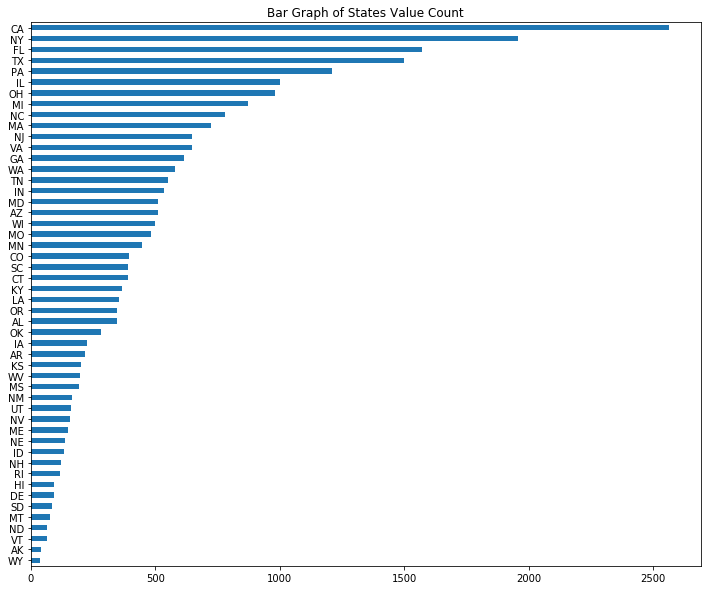

In [19]:
#Value Count for number top 40 in Specialty column
states_value = prescriber.State.value_counts()
print(states_value.head())
states_value.sort_values(ascending=True).plot(kind='barh', figsize=(12,10), title= "Bar Graph of States Value Count")

In [28]:
states_opi = prescriber[prescriber['SumOpi'] > 0].groupby('State').count()['NPI']
print('Top 10 States with the most opioid prescriptions: \n', states_opi.sort_values(ascending=False).head(10))
print()

states_tot = prescriber[prescriber['TotPresc'] > 0].groupby('State').count()['NPI']
print('Top 10 States with the most total prescriptions: \n',states_tot.sort_values(ascending=False).head(10))

Top 10 States with the most opioid prescriptions: 
 State
CA    1293
TX     864
FL     750
NY     711
PA     587
OH     503
IL     499
MI     485
NC     438
GA     352
Name: NPI, dtype: int64

Top 10 States with the most total prescriptions: 
 State
CA    2562
NY    1956
FL    1570
TX    1500
PA    1211
IL    1002
OH     981
MI     872
NC     778
MA     725
Name: NPI, dtype: int64


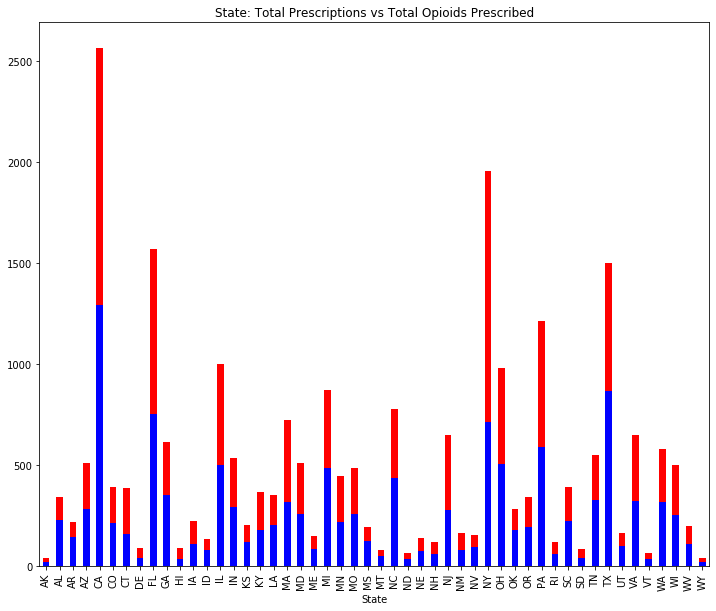

In [29]:
#We'll create a bar graph resprenting the 50 states and compare Total Prescriptions vs Total Opioids Prescribed
ax = states_tot.plot(kind='bar', color='r', width=.5, legend=(), title="State: Total Prescriptions vs Total Opioids Prescribed")
states_opi.plot(kind='bar', color='blue', width=.5, legend=(), alpha=1,figsize=(12,10))

In [30]:
#To get an idea if there's a trend between certain regions throughout the country we can catagorize states into 4 reginal values: North East, Central, South, West

north_east = prescriber[prescriber['State'].isin(['ME', 'NH', 'MA', 'CO', 'VT', 'RI', 'NY', 'PA', 'NJ', 'CT', 'MD', 'VA'])]
central = prescriber[prescriber['State'].isin(['WI', 'MI', 'IL', 'IN', 'OH', 'MN', 'ND', 'SD', 'NE', 'KS', 'IA', 'MO'])]
south = prescriber[prescriber['State'].isin(['WV', 'NC', 'SC', 'GA', 'FL', 'MS', 'TN', 'KY', 'AL', 'LA', 'AR', 'TX', 'OK'])]
west = prescriber[prescriber['State'].isin(['CO', 'NM', 'AZ', 'UT', 'MO', 'NV', 'ID', 'CA', 'WA', 'WY', 'OR', 'HI', 'AK'])]

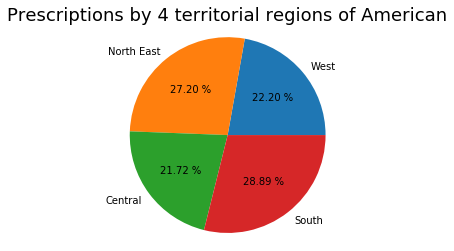

In [31]:
w=west['State'].count()
ne = north_east['State'].count()
c=central['State'].count()
s = south['State'].count()
labels1= ['West', 'North East', 'Central', 'South']
area=[w,ne,c,s]

plt.pie(area, labels=labels1, autopct='%.2f %%')
plt.axis('equal')
plt.title('Prescriptions by 4 territorial regions of American', fontsize=18)
plt.show()

# We can start looking at the data with a focus on the specialties

In [32]:
#Value Count for number top 40 in Specialty column
spec = prescriber.Specialty.value_counts().head(40)
print(spec)

Internal Medicine                                                 3162
Family Practice                                                   2967
Dentist                                                           2771
Nurse Practitioner                                                2511
Physician Assistant                                               1838
Emergency Medicine                                                1081
Psychiatry                                                         686
Cardiology                                                         679
Obstetrics/Gynecology                                              606
Orthopedic Surgery                                                 572
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     545
Ophthalmology                                                      514
General Surgery                                                    484
Gastro

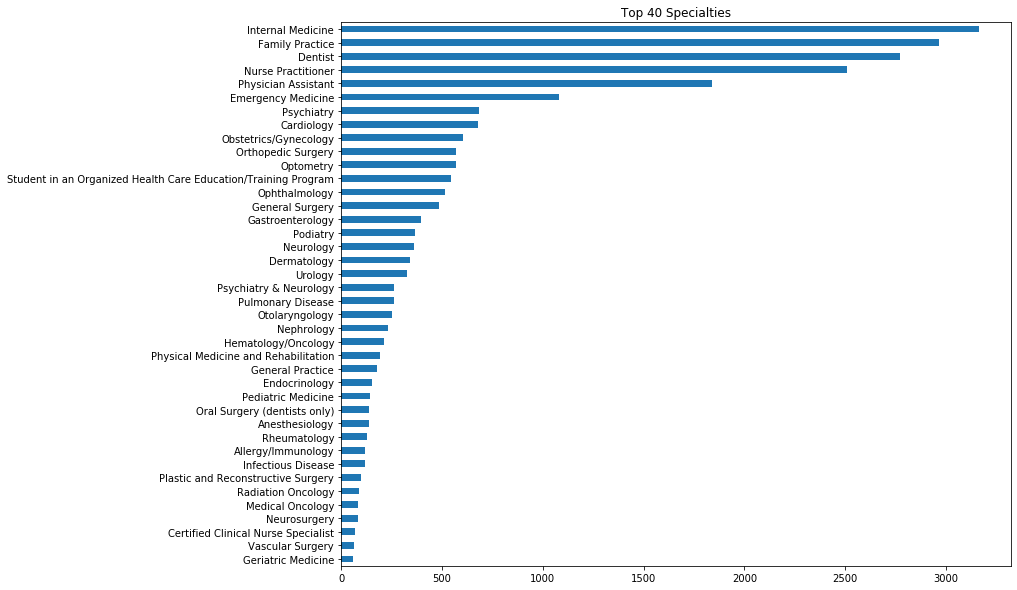

In [33]:
#Create a horizontal bar graph with the Top 40 Specialties based on value count
spec.sort_values(ascending=True).plot(kind='barh', figsize=(12,10), title= "Top 40 Specialties")

In [34]:
#We can see how this chart will look once we rework it with our opioid prescribing and non opoiod prescribing specialists

#Starting with Opioid prescribing specialists
spec_opi = opi_prescribers.Specialty.value_counts().head(40)
print(spec_opi.head(20))

Family Practice                                                   2402
Internal Medicine                                                 2057
Nurse Practitioner                                                1165
Physician Assistant                                               1113
Emergency Medicine                                                 990
Dentist                                                            816
Orthopedic Surgery                                                 547
General Surgery                                                    420
Urology                                                            237
Podiatry                                                           186
Hematology/Oncology                                                173
Student in an Organized Health Care Education/Training Program     172
Physical Medicine and Rehabilitation                               161
Neurology                                                          150
Genera

In [35]:
#Starting with Opioid prescribing specialists
spec_non = non_prescribed.Specialty.value_counts().head(40)
print(spec_non.head(20))

Dentist                                                           1955
Nurse Practitioner                                                1346
Internal Medicine                                                 1105
Physician Assistant                                                725
Psychiatry                                                         638
Optometry                                                          570
Family Practice                                                    565
Cardiology                                                         560
Obstetrics/Gynecology                                              517
Ophthalmology                                                      459
Student in an Organized Health Care Education/Training Program     373
Gastroenterology                                                   323
Dermatology                                                        293
Psychiatry & Neurology                                             256
Neurol

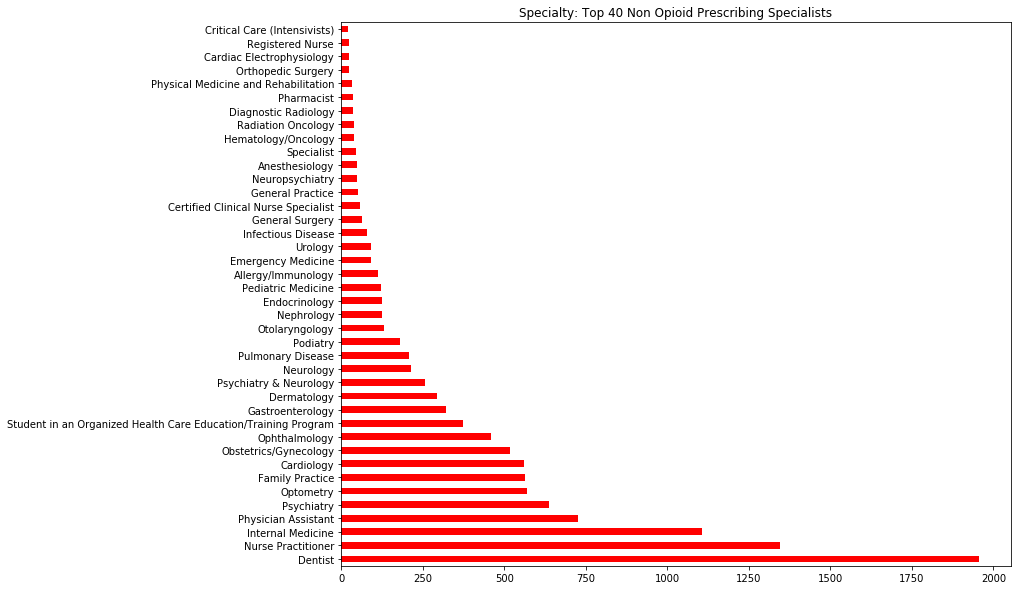

In [36]:
ax1 = spec_non.plot(kind='barh', color='r', width=.5, title="Specialty: Top 40 Non Opioid Prescribing Specialists", figsize=(12,10))

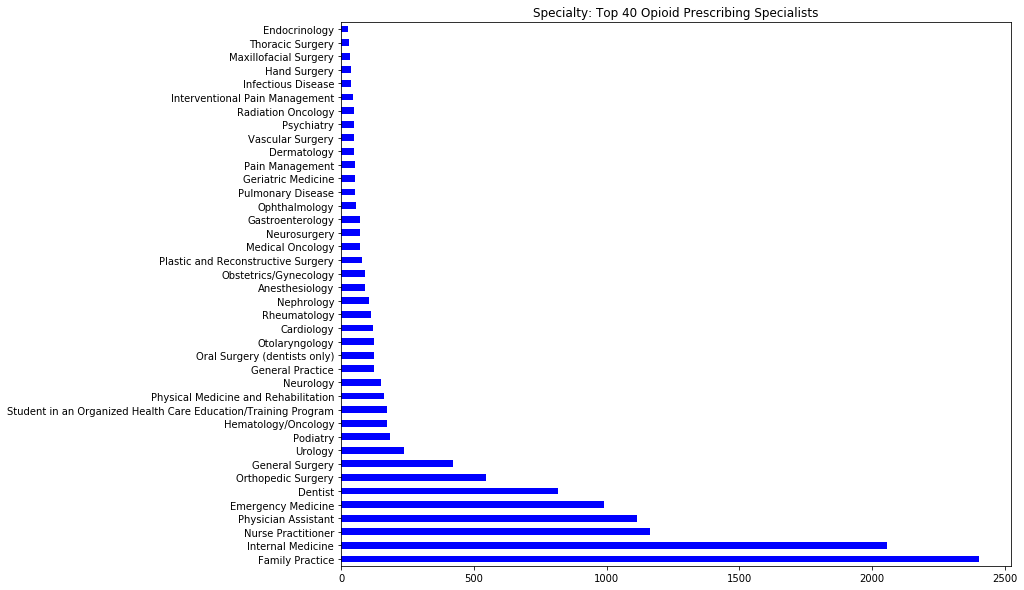

In [37]:
ax2= spec_opi.plot(kind='barh', color='blue', width=.5, title="Specialty: Top 40 Opioid Prescribing Specialists", figsize=(12,10))

As we can see from these bar graphs, the type of specialists differ between the the criterias of non opioid prescribers and opioid prescribers.

In [38]:
#Create a dataframe to formulate the percentage of prescriptions that come from the top 5 Specialties
percent_presc = pd.DataFrame()
percent_presc['Value'] = non_prescribed['Specialty'].value_counts()
percent_presc['Percent'] = percent_presc/sum(percent_presc['Value'])*100


#Print out the top 5 specialties and their percentages in reference to the rest of the specialties
print()
print('Percentage of Prescriptions from the top 5 prescribers: \n',round(percent_presc[['Value','Percent']].head(5),2))


Percentage of Prescriptions from the top 5 prescribers: 
                      Value  Percent
Dentist               1955    16.20
Nurse Practitioner    1346    11.15
Internal Medicine     1105     9.15
Physician Assistant    725     6.01
Psychiatry             638     5.29


In [39]:
#Create a dataframe to formulate the percentage of prescriptions that come from the top 5 Specialties who prescribed opioids
percent_presc2 = pd.DataFrame()


percent_presc2['Value Opi'] = opi_prescribers['Specialty'].value_counts()
percent_presc2['Percent Opi'] = percent_presc2/sum(percent_presc2['Value Opi'])*100

#Print out the top 5 specialties and their percentages in reference to the rest of the specialties
print()
print('Percentage of Prescriptions from the top 5 prescribers: \n',round(percent_presc2[['Value Opi', 'Percent Opi']].head(5),2))


Percentage of Prescriptions from the top 5 prescribers: 
                      Value Opi  Percent Opi
Family Practice           2402        18.93
Internal Medicine         2057        16.21
Nurse Practitioner        1165         9.18
Physician Assistant       1113         8.77
Emergency Medicine         990         7.80


# We can start looking at the data with a focus on the gender

In [40]:
#We'll 1st bring together the total number of Female and Male opioid prescribers within our dataframe
female = opi_prescribers.loc[opi_prescribers['Gender'] == 'F'].count()[0]
male = opi_prescribers.loc[opi_prescribers['Gender'] == 'M'].count()[0]

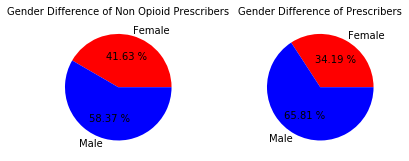

Gender Difference of Non Opioid Prescribers:
  Gender
F    5025
M    7046
dtype: int64

Gender Difference of Prescribers:
  Gender
F     9363
M    15396
dtype: int64


In [41]:
#Now we'll bring together the total number of Female and Male non opioid prescribers within our dataframe
non_presc_female = non_prescribed.loc[non_prescribed['Gender'] == 'F'].count()[0]
non_presc_male = non_prescribed.loc[non_prescribed['Gender'] == 'M'].count()[0]

labels = ['Female', 'Male']
colors = ['r', 'b']

plt.subplot(1,2,1)
plt.pie([non_presc_female, non_presc_male], labels=labels, colors=colors, autopct='%.2f %%', textprops=dict(color="k"))
plt.title('Gender Difference of Non Opioid Prescribers', fontsize=10)
plt.subplot(1,2,2)
plt.pie([female, male], labels=labels, colors=colors, autopct='%.2f %%', textprops=dict(color="k"))
plt.title('Gender Difference of Prescribers', fontsize=10)
plt.tight_layout(pad=2.8)
plt.show()

print('Gender Difference of Non Opioid Prescribers:\n ',non_prescribed.groupby(by='Gender').size())
print()
print('Gender Difference of Prescribers:\n ',prescriber.groupby(by='Gender').size())

# We can start looking at the data found within the overdoses dataframe

In [42]:
# Taking a look at the Overdose Dataframe

In [43]:
overdoses.head()

,State,Population,Deaths,Abbrev
0,Alabama,4833722,723,AL
1,Alaska,735132,124,AK
2,Arizona,6626624,1211,AZ
3,Arkansas,2959373,356,AR
4,California,38332521,4521,CA


In [49]:
pop = overdoses.sort_values(['Population'], ascending = False)
pop2 = overdoses.sort_values(['Deaths'], ascending = False)
overdoses['Death Rate'] = (overdoses['Deaths'] / overdoses['Population'])*100000
rate_death = prescriber['Death Rate']



rate_death

0        14.957418
1        16.867719
2        18.274766
3        12.029575
4        11.794163
           ...    
24995          NaN
24996          NaN
24997          NaN
24998          NaN
24999          NaN
Name: Death Rate, Length: 24759, dtype: float64

In [54]:
overdoses.drop('State', axis=1, inplace=True)
overdoses.rename(columns={'Abbrev': 'State'})

,Population,Deaths,State,Death Rate
0,4833722,723,AL,14.957418
1,735132,124,AK,16.867719
2,6626624,1211,AZ,18.274766
3,2959373,356,AR,12.029575
4,38332521,4521,CA,11.794163
5,5268367,899,CO,17.064111
6,3596080,623,CT,17.324420
7,925749,189,DE,20.415901
8,19552860,2634,FL,13.471175
9,9992167,1206,GA,12.069454


# We can start looking at the data with a focus on the the actual drugs. Opioids and Non Opioids

In [139]:
#Create a dataframe containing only the opioids found in our prescriber dataframe
df_opi = prescriber[['State', 'Gender', 'Specialty', 'HYDROMORPHONE.HCL',
 'OXYCONTIN',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL',
 'MORPHINE.SULFATE.ER',
 'HYDROCODONE.ACETAMINOPHEN',
 'FENTANYL',
 'MORPHINE.SULFATE',
 'METHADONE.HCL',
 'OXYCODONE.ACETAMINOPHEN',
 'ACETAMINOPHEN.CODEINE', 'SumOpi', 'TotPresc']]


In [136]:
#non_presc = non_prescribed.drop(df_opi, axis=1)

#We'll take each opioid and find their sums
sum_non_presc = non_presc.iloc[:,1:240].sum()

sum_non_presc = sum_non_presc.sort_values(ascending=False).head(11)

In [99]:
#We'll take each opioid and find their sums
sum_opi = df_opi.iloc[:,3:14].sum()

In [132]:
sum_opi.sort_values(ascending=False)

HYDROCODONE.ACETAMINOPHEN    957439
TRAMADOL.HCL                 398734
OXYCODONE.ACETAMINOPHEN      240134
OXYCODONE.HCL                172286
MORPHINE.SULFATE.ER           88190
FENTANYL                      85344
ACETAMINOPHEN.CODEINE         58477
OXYCONTIN                     49727
METHADONE.HCL                 35789
HYDROMORPHONE.HCL             23159
MORPHINE.SULFATE              20707
dtype: int64

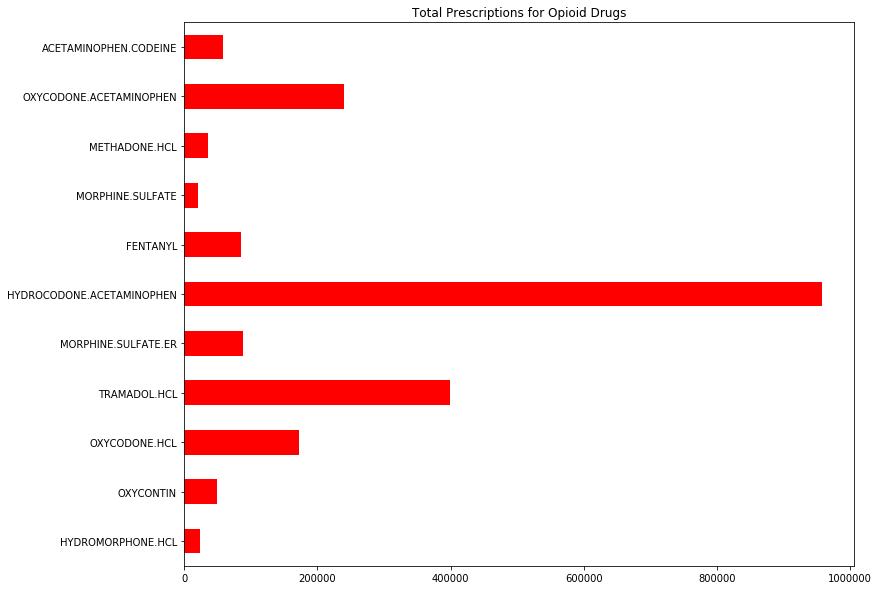

In [140]:
twig = sum_opi.plot(kind='barh', color='r', width=.5, title="Total Prescriptions for Opioid Drugs", figsize=(12,10))


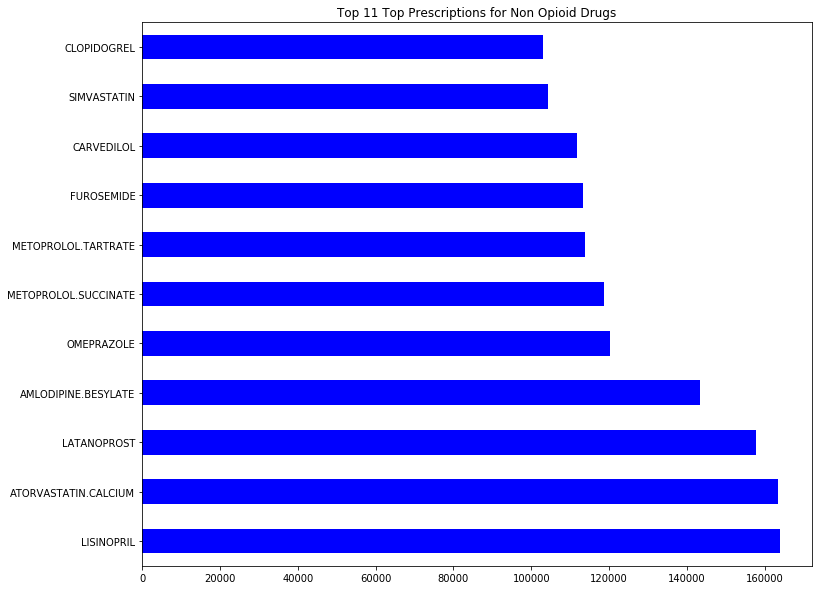

In [138]:
twig2 =ax1 =sum_non_presc.plot(kind='barh', color='b', width=.5, title="Top 11 Top Prescriptions for Non Opioid Drugs", figsize=(12,10))

We went with the top 11 non opioid prescribed drugs to match the 11 opioid drugs that we've been using throughout. Lisinopril is a drug that is prescribed to patients who have high blood pressure. For most patients it has little side effects so it's not surprising that it is so heavily prescibed.

On the opioid side, HYDROCODONE.ACETAMINOPHEN almost triples in the amount of other prescribed opioids. It is a drug prescribed to relieve moderate to severe pain.